Lognormal distribution is the reason for citation success index
===
This is a notebook for our paper:

> Zhesi Shen, Liying Yang, Jinshan Wu, Lognormal distribution of citation counts is the reason for the relation between Impact Factors and Citation Success Index, Journal of Informetrics 12(1), 153-157 (2018).


In a recent paper published in the {\it Journal of Informetrics}, Milojevi\'{c}, Radicchi and Bar-Ilan~\citep{Milojevic2017} present a Citation Success Index (CSI) to compare the citation capacity of two journals. CSI between two journals is defined as the probability of a randomly chosen paper from one journal having larger citation count than a randomly chosen paper from the other journal. They found that CSI is a relatively tight function of the ratio of the Impact Factors {(IFs)} of the compared journals and the probability will be high if the \revision{IF ratio exceeds} ~6 implying the effectiveness of IFs in comparing journals to some extent. Such idea of pair-wise journal comparison metric is also used by Stringer, Sales-Pardo and Amaral~\citep{stringer2008effectiveness} for ranking journals. Stringer, Sales-Pardo and Amaral  find that the citation distribution of papers in a given journal in a specific publication year will converge to a steady distribution after a transient time which can be approximately modeled as log-normal distribution. In this work, we show that such a log-normal form is the cause for the specific relation between the IFs ratio and CSI.



### Citation Success Index
Let $t$ be a target journal and $r$ a reference journal and the citations of each paper $\{c^i_r\}$ and $\{c^i_t\}$ respectively. The average citation of each journal is $C_r = \langle c^i_r \rangle$ and $C_t = \langle c^i_t \rangle$. The Citation Success Index (CSI, denoted in formula as $S_{tr}$) of the target journal $t$ compared with the reference journal $r$ \footnote{In original paper~\citep{Milojevic2017}, CSI \revision{is calculated using citation counts} based on a citing window that is the same as the citing window of the IF reported in the Journal Citation Reports (JCR). CSI can also be calculated using other citing windows.} is defined as the probability of the citation count of a randomly selected paper from journal $t$ being larger than that of a randomly paper from journal $r$, i.e.,
$$
S_{tr} = \sum_{c=0}^{\infty} [P_t(>c) + 1/2P_t(c)]P_r(c),
$$
{where $P_t(>c)$ is the fraction of papers having a number of citations larger than $c$ in journal $t$, and $P_r(c)$ is the fraction of papers with $c$ citations in journal $r$.}
The tight function between $S$ and $C_t/C_r$ reported by Milojevi\'{c}, Radicchi and Bar-Ilan~\citep{Milojevic2017} is given as
$$
S_{tr} = f_0/2 +\frac{1-f_0/2}{1+qx^{-k}},
$$
where $x=C_t/C_r$, $q=1/(1-f_0)$, $k=1.23$ and \revision{$f_0$ is the fraction of uncited papers in the reference journal $r$}, and is given as
$f_0 = \frac{1}{(1+qIF^\alpha)^\beta}$, 
where $\alpha=0.94$, $\beta=2.37$ and $q=0.33$.


### Derivation of CSI based on log-normal assumption
Under the log-normal assumption, the logarithm of the result of adding one to a paper's citation count follows normal distribution, i.e., $ln(c+1)\sim N(\mu,\sigma)$. Let $z^i_r = ln(c^i_r +1)$ and $z^i_t = ln(c^i_t +1)$, thus $z^i_r$ and $z^i_t$ are assumed to follow normal distributions, i.e., $\rho_r \equiv N(\mu_r,\sigma_r)$ and $\rho_t \equiv N(\mu_t,\sigma_t)$ respectively. 
Theoretically , CSI can be estimated using $\rho_t$ and $\rho_r$ as\footnote{Let $x=z_t-z_r$, then $x$ also \revision{follows a normal distribution} $\rho_x \equiv N(\mu_t -\mu_r,\sqrt{\sigma_r^2+\sigma_t^2})$. So the cumulative probability $\int_{z_t-z_r>0} \rho_r(z_r) \rho_t(z_t)  dz_rdz_t$ can be calculated via $\int^{\infty}_{0} \rho(x; \mu_t - \mu_r, \sqrt{\sigma_r^2+\sigma_t^2})dx$.}
$$
S_{tr} = \int_{-\infty}^{\infty} \rho_r(z_r) dz_r \int_{z_r}^{\infty} \rho_t(z_t) dz_t  \\
= \int_{z_t-z_r>0} \rho_r(z_r) \rho_t(z_t)  dz_rdz_t\\
= \int^{\infty}_{0} \rho(x; \mu_t - \mu_r, \sqrt{\sigma_r^2+\sigma_t^2})dx \\
= \int^{\infty}_{- \frac{(\mu_t - \mu_r)}{\sqrt{\sigma_r^2+\sigma_t^2}}} \rho(x;0,1)dx,
$$
where $\rho(x; \mu, \sigma)$ is the probability density function of a normal distribution with mean $\mu$ and standard deviation $\sigma$.

In [1]:
# load packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
## load citation data

journals = {}
with open('sample_data.txt','r') as fr:
    for line in fr:
        jour,citation = line.strip().split('|')
        journals[jour] = [int(i) for i in citation.split(',')]

In [5]:
## some basis functions

# calculate the CSI directly
def csi_empirical(x1,x2):
    count = 0
    for i in x1:
        for j in x2:
            if i>j:
                count+=1
            if i==j:
                count += 0.5
    return 1.0*count/len(x1)/len(x2)


# estimate CSI from Eq Milojevic
def csi_Milojevic(IFt,IFr):
    alpha,beta,q = 0.94,2.37,0.33

    f0 = 1.0/(1+q*IFr**alpha)**beta
    x = IFt/IFr

    k = 1.23
    q = 1.0/(1-f0)
    S = f0/2.0 + (1 - f0/2.0)/(1 + q*x**(-k))
    return S

# estimate CSI based on lognormal assumption
def csi_lognorm(mu1,mu2,delta1,delta2):
    p = 1 - norm.cdf(-(mu1-mu2)/np.sqrt(delta1+delta2))
    return p


def cal_mean_and_variance(_citation_list):
    return np.mean(_citation_list),np.std(_citation_list)





In [7]:
# calculating CSI -empirical and theoretical
csiE = []
csiM = []
csiLog = []
for j1 in journals:
    for j2 in journals:
            csiE.append(csi_empirical(journals[j1],journals[j2]))

            mu1,_ = cal_mean_and_variance(journals[j1])
            mu2,_ = cal_mean_and_variance(journals[j2])
            csiM.append(csi_Milojevic(mu1,mu2))

            mu1,sigma1 = cal_mean_and_variance([np.log(i+1) for i in journals[j1]])
            mu2,sigma2 = cal_mean_and_variance([np.log(i+1) for i in journals[j2]])
            csiLog.append(csi_lognorm(mu1,mu2,sigma1**2,sigma2**2))

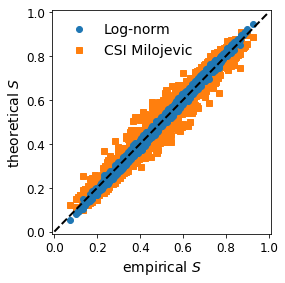

In [9]:
# Figure：comparison of CSI -empirical and theoretical
plt.figure(figsize=(4,4))
plt.plot(csiE,csiLog,'o',label='Log-norm')
plt.plot(csiE,csiM,'s',zorder=-1,label='CSI Milojevic')
plt.plot([0,1],[0,1],'k--',lw=2,zorder=2)
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)

plt.xlabel(r'empirical $S$',fontsize=14)
plt.ylabel(r'theoretical $S$',fontsize=14)

# Tweak spacing to prevent clipping of ylabel
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='best',frameon=False,numpoints=1,fontsize=14)

Furthermore we would like to explain why only \revision{IF} (or average citation per paper) ratio matters. As illustrated in Eq.~\ref{eq:csi_log}, $S_{tr}$ is determined by the ratio of ${(\mu_t - \mu_r)}$ and ${\sqrt{\sigma_r^2+\sigma_t^2}}$. We investigate the relation between ${(\mu_t - \mu_r)}$ and $\frac{(\mu_t - \mu_r)}{\sqrt{\sigma_r^2+\sigma_t^2}}$.


1.11037136651 2.46636721551e-18


Text(-1.02108,1.41111,'(a)')

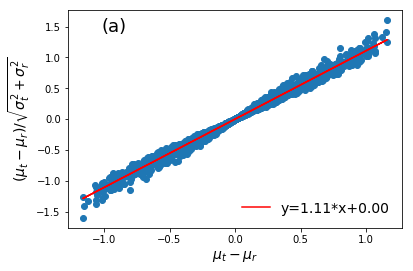

In [12]:
# find the relation between std and mean
Std = []
Avg = []
IF = []
for j1 in journals:
    mu1,sigma1 = cal_mean_and_variance([np.log(i+1) for i in journals[j1]])
    Std.append(sigma1)
    Avg.append(mu1)
    mu1,_ = cal_mean_and_variance(journals[j1])
    IF.append(mu1)
    
N = len(Avg)

xx = []
yy = []
for i in range(N):
    for j in range(N):
        xi,yi = Avg[i],Std[i]
        xj,yj = Avg[j],Std[j]
        
        xx.append((xi-xj))
        yy.append((xi-xj)/np.sqrt(yi**2 + yj**2))
        
plt.plot(xx,yy,'o')
plt.xlabel('$\mu_t - \mu_r$',fontsize=14)
plt.ylabel('$(\mu_t - \mu_r)/\sqrt{\sigma^2_t + \sigma^2_r}$',fontsize=14)

x = np.array(xx)
y = np.array(yy)
A = np.vstack([xx, np.ones(len(xx))]).T
m, c = np.linalg.lstsq(A, y)[0]
print(m,c)

plt.plot(x, m*x + c, 'r', label='y=%.2f*x+%.2f'%(m,c))
frange = np.linspace(min(x),max(x),50)
plt.legend(loc='lower right',frameon=False,fontsize=14)
x0, xmax = plt.xlim()
y0, ymax = plt.ylim()
data_width = xmax - x0
data_height = ymax - y0
plt.text(x0 + data_width * 0.1, y0 + data_height * 0.9, '(a)', fontsize=18);


The relation between IF and average logarithm citation

0.862530091292 -0.0873527000195


Text(0.372402,1.3056,'(b)')

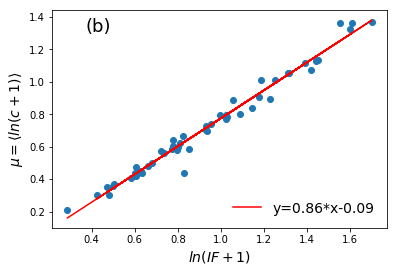

In [14]:
# relation between log-mean and mean-log
plt.plot([np.log(i+1) for i in IF],Avg,'o')

log_if = [np.log(i+1) for i in IF]

x = np.array(log_if)
y = np.array(Avg)
A = np.vstack([log_if, np.ones(len(log_if))]).T
b, cc = np.linalg.lstsq(A, y)[0]
print(b,cc)


if cc > 0:
    txt = 'y=%.2f*x+%.2f'%(b,abs(cc))
else:
    txt = 'y=%.2f*x-%.2f'%(b,abs(cc))
plt.plot(x, b*x + cc, 'r', label=txt)

plt.legend(loc='lower right',frameon=False,fontsize=14)


plt.xlabel(r'$ln(IF+1)$',fontsize=14)
plt.ylabel(r'$\mu=\langle ln(c+1) \rangle$',fontsize=14)
x0, xmax = plt.xlim()
y0, ymax = plt.ylim()
data_width = xmax - x0
data_height = ymax - y0
plt.text(x0 + data_width * 0.1, y0 + data_height * 0.9, '(b)', fontsize=18)

The values of $\mu$ and values of $\ln(C+1)$ are linearly related as shown in \revision{Fig.~\ref{fig:csi_log}(b), indicating} $\mu_t - \mu_r \sim \ln (C_t+1 / C_r+1)$. Finally, we obtain that $S_{tr}$ is determined by $C_t$ and $C_r$ as


$$
S_{tr} = \int^{\infty}_{- a(\mu_t - \mu_r)} \rho(x;0,1)dx\\
= \int^{\infty}_{- a[b(\ln(C_t+1/C_r+1)]} \rho(x;0,1)dx
$$
where $a=1.11$ and $b=0.86$ are the fitting parameters shown in Fig.~\ref{fig:csi_log} (a) and (b). 

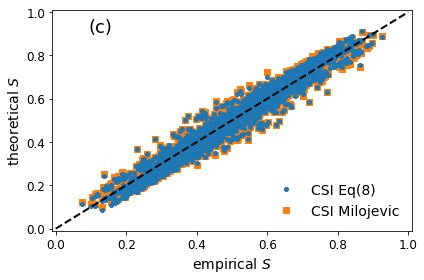

In [16]:
# Figure: estimation simply based on ratio of IFs
Fall_bb = []
for j1 in journals:
    for j2 in journals:
            mu1,sigma1 = cal_mean_and_variance(journals[j1])
            mu2,sigma2 = cal_mean_and_variance(journals[j2])
            Fall_bb.append(((mu1+1)/(mu2+1)))


plt.plot(csiE,[1 - norm.cdf(-(m*b*np.log(i) + c)) for i in Fall_bb],'o',ms=4,label='CSI Eq(8)')
plt.plot(csiE,csiM,'s',zorder=-1,label='CSI Milojevic')
plt.plot([0,1],[0,1],'k--',lw=2,zorder=2)
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)

plt.xlabel(r'empirical $S$',fontsize=14)
plt.ylabel(r'theoretical $S$',fontsize=14)

# Tweak spacing to prevent clipping of ylabel
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='lower right',frameon=False,numpoints=1,fontsize=14)

x0, xmax = plt.xlim()
y0, ymax = plt.ylim()
data_width = xmax - x0
data_height = ymax - y0
plt.text(x0 + data_width * 0.1, y0 + data_height * 0.9, '(c)', fontsize=18)

plt.tight_layout()

The comparison between the empirical CSI and the predictions using Eq.~\ref{eq:csi_log_theory} is presented in Fig.~\ref{fig:csi_log}(c), showing good agreement. In addition, the high overlap between the yellow squares and blue dots implies that the logistic shape of Eq.~\ref{eq:csi_theory} is indeed determined by log-normal distribution.